#Passo 1: importação das bibliotecas necessárias para treinamento de maquina

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dt = pd.read_csv('cogumelos_MODIFICADO.csv')
dt.info()
dt.sample(5)

In [4]:
dt = dt.drop(columns=['coluna completamente inutil (me remova)', 'coluna de origem duvidosa (use por sua conta em risco)'], axis=1)
dt_semnan = dt.dropna()
dt_semnan = dt_semnan.drop_duplicates()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   comestivel           52954 non-null  float64
 1   diâmetro do chapéu   52954 non-null  float64
 2   forma do chapéu      52954 non-null  float64
 3   fixação das lamelas  52954 non-null  float64
 4   cor das lamelas      52954 non-null  float64
 5   altura do caule      52954 non-null  float64
 6   largura do caule     52954 non-null  float64
 7   cor do caule         52954 non-null  float64
 8   estação              52954 non-null  float64
dtypes: float64(9)
memory usage: 3.7 MB


In [8]:
dt_semnan.sample(10)

,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule,estação
52003,1.0,285.0,6.0,3.0,2.0,2.013794,0.0,2.0,0.888450
10938,0.0,608.0,1.0,1.0,10.0,0.509736,44.0,6.0,0.888450
25210,0.0,1084.0,6.0,6.0,5.0,0.329830,2306.0,10.0,1.804273
44566,1.0,1680.0,8.0,4.0,11.0,1.165418,2669.0,12.0,0.943195
46382,0.0,610.0,10.0,4.0,3.0,2.661518,2768.0,11.0,0.888450
4298,0.0,1125.0,2.0,7.0,7.0,0.255081,1756.0,10.0,0.943195
470,1.0,1832.0,2.0,5.0,10.0,1.997027,1537.0,11.0,0.888450
11102,1.0,705.0,0.0,4.0,3.0,0.306808,496.0,10.0,0.888450
46680,0.0,1017.0,10.0,4.0,11.0,1.376304,1571.0,12.0,0.943195
3138,1.0,811.0,0.0,6.0,10.0,0.728581,281.0,11.0,0.888450


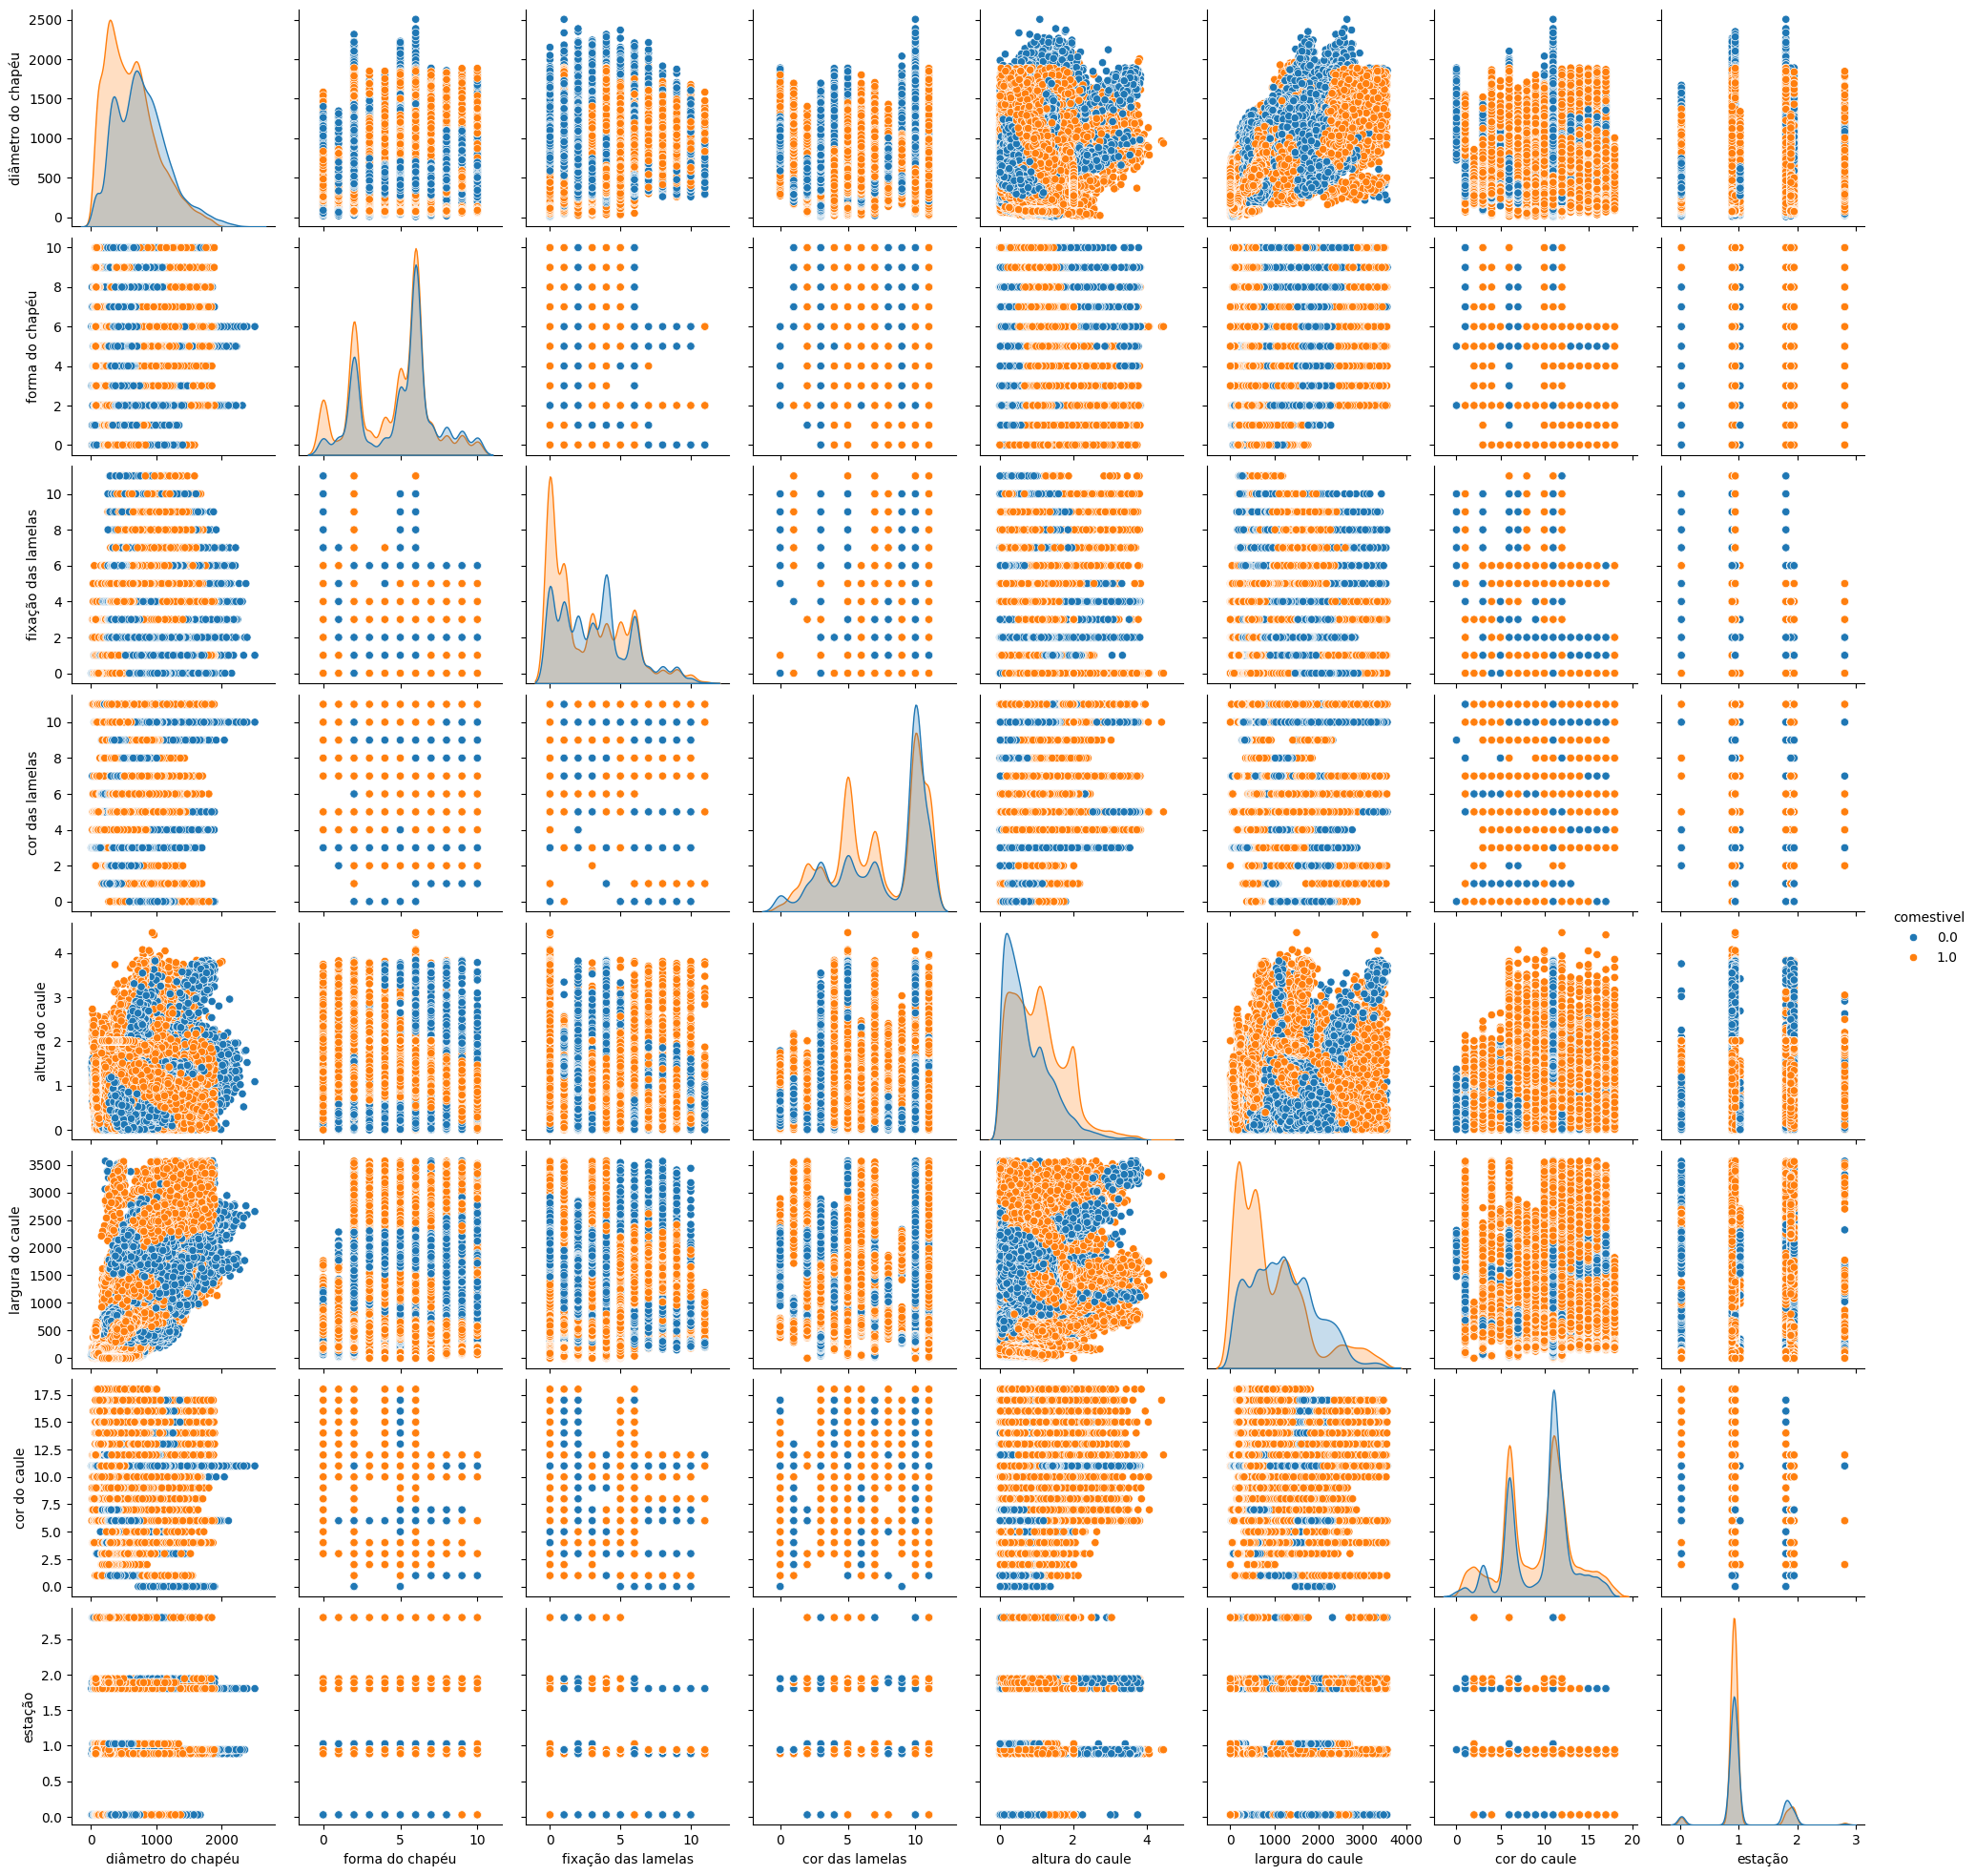

In [9]:
sns.pairplot(dt_semnan, hue='comestivel')
plt.show()

In [102]:
x = dt_semnan.drop(columns=['comestivel'], axis=1) # todas as colunas menos a de comestivel
y = dt_semnan['comestivel'] # apenas a coluna de comestivel
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maquina = RandomForestClassifier(n_estimators=100, random_state=42)
maquina.fit(x_train, y_train)
maquina.score(x_test, y_test)
print(accuracy_score(y_test, maquina.predict(x_test)))


0.9831186139493558
